In [11]:
%run setup_env.py


In [12]:
from algorithms.nn.nn import Sequential
from algorithms.nn.layers import Dense
import numpy as np
from algorithms.nn.loss import mse, mse_derivative, binary_cross_entropy, binary_cross_entropy_derivative
from algorithms.utils import compute_loss, compute_accuracy

# Visualizing dataset

In [13]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [14]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [15]:
# increase dimension of y
y_req = y[:, None]
y_req[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [16]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


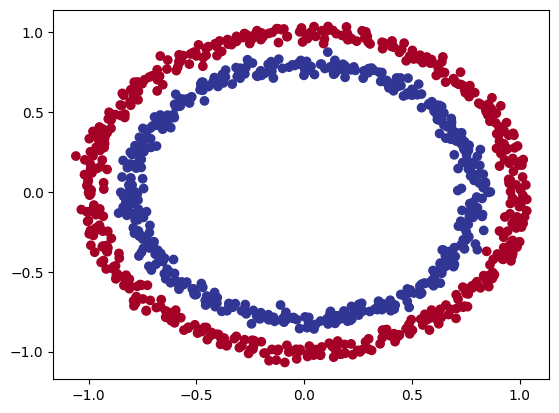

In [17]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

# Training the Model and Evaluating

In [19]:
def train_model(model, n_epochs, X, Y, p= True):
    lr_start = 0.0001
    lr_end = 0.00000001

    
    for epoch in range(n_epochs):
        # forward pass
        y_preds = model.forward(X)
        y_preds = np.clip(y_preds, 1e-4, 1 - 1e-4)
        y_val = np.round(y_preds[:, 0])
        # compute loss and accuracy
        loss = compute_loss(y_preds[:, 0], Y, binary_cross_entropy)
        accuracy = compute_accuracy(y_val, Y)
        if p:
            print(f"Epoch {epoch}, loss: {loss} accuracy: {accuracy}")
    
        # backward pass
        gradient = binary_cross_entropy_derivative( Y[:, None], y_preds)
        lr = lr_start - epoch / n_epochs * (lr_start - lr_end)
        model.backward(gradient,lr)
    print("Training complete")

In [20]:
model1 = Sequential(layers=[
    Dense(input_size=2, output_size=4),
    Dense(input_size=4, output_size=1, activation="sigmoid"),
])
model1

Layer(2, 4, None) -> Layer(4, 1, <function sigmoid at 0x7f4d7fe6a700>)

In [21]:
train_model(model1, 1000, X_train, y_train)
    

Epoch 0, loss: 812.52297601821 accuracy: 0.5225
Epoch 1, loss: 792.7081673327962 accuracy: 0.52375
Epoch 2, loss: 774.4270268790139 accuracy: 0.5225
Epoch 3, loss: 757.5684136861507 accuracy: 0.52125
Epoch 4, loss: 742.0283154678475 accuracy: 0.5225
Epoch 5, loss: 727.7095919363032 accuracy: 0.52125
Epoch 6, loss: 714.5216402694608 accuracy: 0.52125
Epoch 7, loss: 702.3800183829321 accuracy: 0.525
Epoch 8, loss: 691.2060537323808 accuracy: 0.525
Epoch 9, loss: 680.9264576660586 accuracy: 0.52375
Epoch 10, loss: 671.4729584938542 accuracy: 0.5225
Epoch 11, loss: 662.7819607653594 accuracy: 0.5225
Epoch 12, loss: 654.7942338570437 accuracy: 0.5225
Epoch 13, loss: 647.4546298080772 accuracy: 0.52125
Epoch 14, loss: 640.7118282739403 accuracy: 0.52125
Epoch 15, loss: 634.5181052981134 accuracy: 0.52125
Epoch 16, loss: 628.8291221318651 accuracy: 0.52
Epoch 17, loss: 623.6037303652272 accuracy: 0.51625
Epoch 18, loss: 618.8037899952442 accuracy: 0.51625
Epoch 19, loss: 614.3939976063293 acc

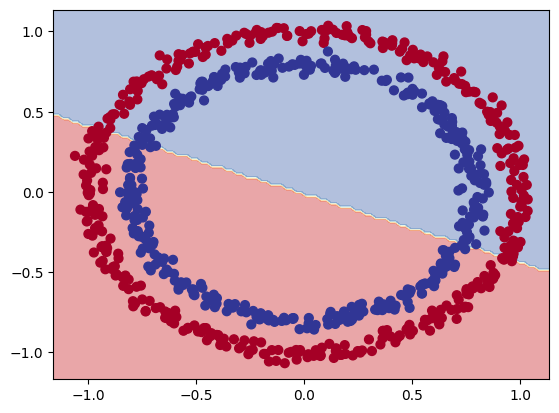

In [22]:
from algorithms.utils import plot_decision_boundary

plot_decision_boundary(model1, X_train, y_train)

## Introducing Non-Linearities
We say how the previous model is just as good as random guesser because straight lines can't enclose circular patterns. We need to introduce non-linearities to the model to make it work. 

| Model Improvement Technique        | Description                                                                                                                                               |
|------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Add more layers                    | Each layer potentially increases the learning capabilities of the model, with each layer able to learn new patterns in the data. More layers make the network deeper. |
| Add more hidden units              | More hidden units per layer mean a potential increase in the model's learning capabilities. More hidden units make the network wider.                       |
| Fitting for longer (more epochs)   | The model might learn more if it has more opportunities to look at the data.                                                                                |
| Changing the activation functions  | Non-linear activation functions can help fit data that can't be fit with only straight lines.                                                              |
| Change the learning rate           | The learning rate decides how much a model should change its parameters each step. Too high and the model overcorrects; too low and it doesn't learn enough. |
| Change the loss function           | Different problems require different loss functions. For example, binary cross-entropy won't work for multi-class classification.                           |
| Use transfer learning              | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem.                                                           |


In [23]:
model2 = Sequential(layers=[
    Dense(input_size=2, output_size=4, activation="relu"),
    Dense(input_size=4, output_size=1, activation="sigmoid"),
])
model2

Layer(2, 4, <function relu at 0x7f4d7fe6a790>) -> Layer(4, 1, <function sigmoid at 0x7f4d7fe6a700>)

In [24]:
train_model(model2, 1000, X_train, y_train)

Epoch 0, loss: 1030.5937695305565 accuracy: 0.5
Epoch 1, loss: 1014.0243575141353 accuracy: 0.5
Epoch 2, loss: 997.8852260873321 accuracy: 0.5
Epoch 3, loss: 982.1922844831433 accuracy: 0.5
Epoch 4, loss: 966.9342949854081 accuracy: 0.5
Epoch 5, loss: 952.096580991892 accuracy: 0.5
Epoch 6, loss: 937.6681206307148 accuracy: 0.5
Epoch 7, loss: 923.6462437664736 accuracy: 0.5
Epoch 8, loss: 910.0299150157385 accuracy: 0.5
Epoch 9, loss: 896.791064543786 accuracy: 0.5
Epoch 10, loss: 883.931055708466 accuracy: 0.5
Epoch 11, loss: 871.4475587676503 accuracy: 0.5
Epoch 12, loss: 859.3426760882819 accuracy: 0.5
Epoch 13, loss: 847.6109988904323 accuracy: 0.5
Epoch 14, loss: 836.244618412979 accuracy: 0.5
Epoch 15, loss: 825.2393072134224 accuracy: 0.5
Epoch 16, loss: 814.59283254044 accuracy: 0.5
Epoch 17, loss: 804.292913625198 accuracy: 0.5
Epoch 18, loss: 794.3310032286965 accuracy: 0.5
Epoch 19, loss: 784.702820961319 accuracy: 0.5
Epoch 20, loss: 775.400942268825 accuracy: 0.5
Epoch 21,

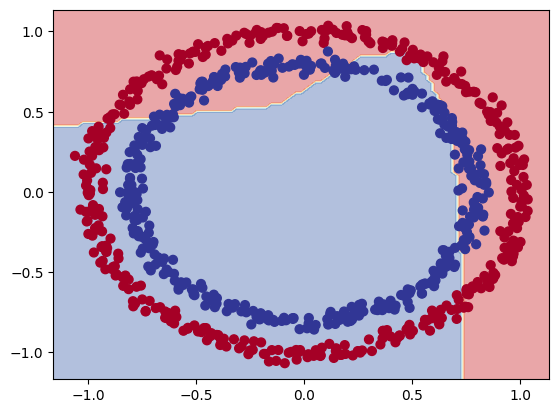

In [25]:
plot_decision_boundary(model2, X_train, y_train)

## Testing various model architectures

In [26]:
models = [
    Sequential(layers=[
        Dense(input_size=2, output_size=4),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=4, activation="relu"),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=8, activation="relu"),
        Dense(input_size=8, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=16, activation="relu"),
        Dense(input_size=16, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=4, activation="relu"),
        Dense(input_size=4, output_size=8),
        Dense(input_size=8, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=8, activation="relu"),
        Dense(input_size=8, output_size=4),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=7, activation="relu"),
        Dense(input_size=7, output_size=4),
        Dense(input_size=4, output_size=1, activation="sigmoid"),
    ]),
    Sequential(layers=[
        Dense(input_size=2, output_size=7, activation="relu"),
        Dense(input_size=7, output_size=5, activation="relu"),
        Dense(input_size=5, output_size=1, activation="sigmoid"),
    ]),
]

Training complete
Model 1 accuracy: 0.46, loss: 138.93591185878475
Training complete
Model 2 accuracy: 0.565, loss: 132.13509937447952
Training complete
Model 3 accuracy: 0.615, loss: 127.64884112386508
Training complete
Model 4 accuracy: 0.665, loss: 120.18303649670021
Training complete
Model 5 accuracy: 0.55, loss: 131.14985407989064
Training complete
Model 6 accuracy: 0.7, loss: 109.02820344538421
Training complete
Model 7 accuracy: 0.47, loss: 144.39750833326204
Training complete
Model 8 accuracy: 0.615, loss: 121.61149797461286


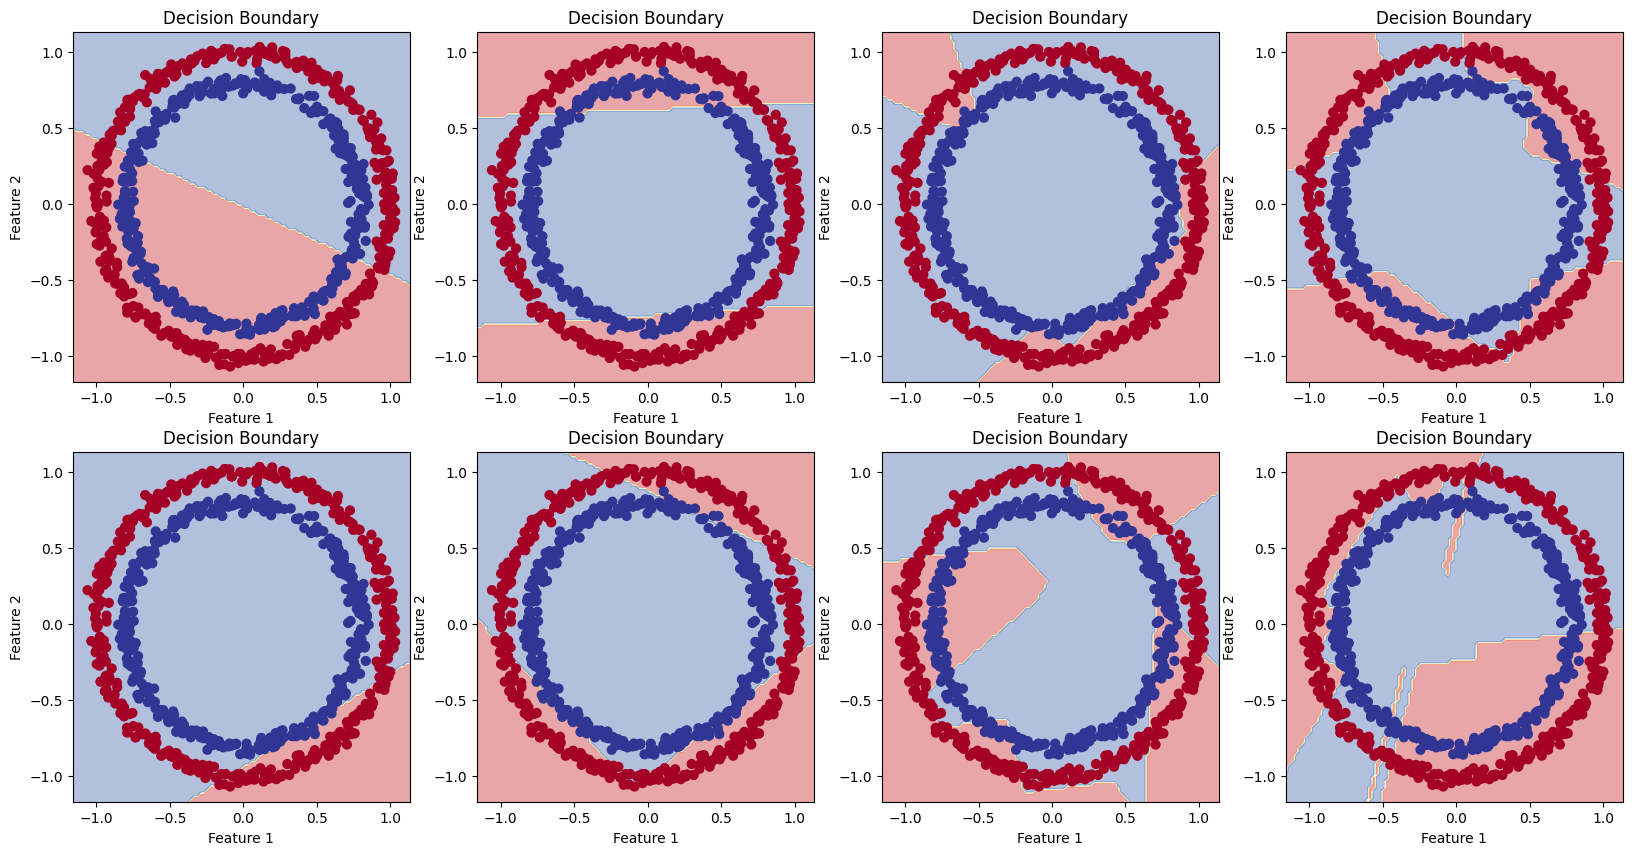

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
from algorithms.utils import plot_decision_boundary_on_axes
for i,model in enumerate(models):
    train_model(model, 5000, X_train, y_train, p=False)
    accuracy = compute_accuracy(np.round(model.forward(X_test)[:, 0]), y_test)
    loss = compute_loss(model.forward(X_test)[:, 0], y_test, binary_cross_entropy)
    
    print(f"Model {i+1} accuracy: {accuracy}, loss: {loss}")
    x, y = i // 4, i %4
    plot_decision_boundary_on_axes(model, X_train, y_train, ax=ax[x][y])

Epoch 0, loss: 712.698819438197 accuracy: 0.4825
Epoch 1, loss: 702.0118721209899 accuracy: 0.49
Epoch 2, loss: 688.4563781380407 accuracy: 0.495
Epoch 3, loss: 672.7149081169138 accuracy: 0.5
Epoch 4, loss: 656.3689395039257 accuracy: 0.50625
Epoch 5, loss: 641.8566945994087 accuracy: 0.5275
Epoch 6, loss: 629.6378428576202 accuracy: 0.5725
Epoch 7, loss: 619.0224886549668 accuracy: 0.56625
Epoch 8, loss: 610.438898707195 accuracy: 0.5625
Epoch 9, loss: 603.9982363794463 accuracy: 0.56625
Epoch 10, loss: 598.9303164270011 accuracy: 0.5675
Epoch 11, loss: 594.753533354356 accuracy: 0.5725
Epoch 12, loss: 591.2985944960465 accuracy: 0.575
Epoch 13, loss: 588.1949193562914 accuracy: 0.5825
Epoch 14, loss: 584.8847733764799 accuracy: 0.59
Epoch 15, loss: 581.3757845591505 accuracy: 0.5975
Epoch 16, loss: 577.930248757281 accuracy: 0.6
Epoch 17, loss: 574.7672312785219 accuracy: 0.60625
Epoch 18, loss: 571.8819253586848 accuracy: 0.61
Epoch 19, loss: 569.1012357123814 accuracy: 0.60875
Epo

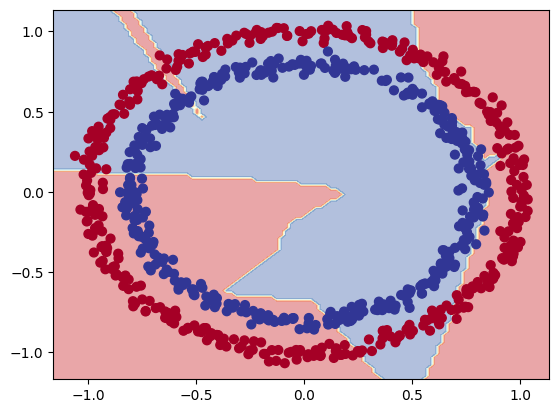

In [28]:
final_model = Sequential(layers=[
    Dense(input_size=2, output_size=10, activation='relu'),
    Dense(input_size=10, output_size=10, activation='relu'),
    Dense(input_size=10, output_size=1, activation='sigmoid')
])
from algorithms.utils import plot_decision_boundary
train_model(final_model, 5000, X_train, y_train)
plot_decision_boundary(final_model, X_train, y_train)

Validation accuracy: 0.61


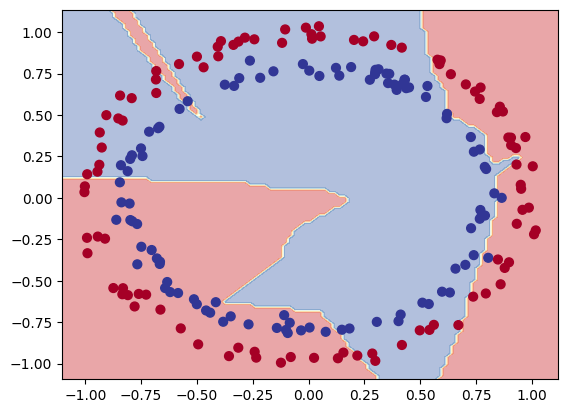

In [29]:
accuracy = compute_accuracy(np.round(final_model.forward(X_test)[:, 0]), y_test)

print("Validation accuracy:", accuracy)
plot_decision_boundary(final_model, X_test, y_test)


## Conclusions

- Try various simpler models first to see what they are achieiving.
- Then start with more complex models.